In [1]:
import pandas as pd 

In [2]:
# 读取数据
data = pd.read_csv(r'X:\Datasets\Blockchain\xblock.pro\eth-phishing-detection\datasets\etherscan\features.csv')
# 重命名columns 1->shapelet1, 2->shapelet2, ...
columns_keys = {str(i): 'shapelet' + str(i) for i in range(10)}
data.rename(columns=columns_keys, inplace=True)

data.head()

,address,value_out,value_in,balance,degree,degree_in,degree_out,max_value,min_value,mean_value,...,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,label
0,0x000000000532b45f47779fce440748893b257865,117.129473,117.132025,-0.002552,23,20,3,39.044000,0.00041,10.185283,...,55357.869541,14238.730042,8353.928243,38354.888309,11993.482352,156493.980320,51710.903250,16639.793390,45925.993078,0
1,0x00000000072d54638c2c2a3da3f715360269eea1,215.965533,215.193910,0.771623,53,30,23,208.090009,0.00000,8.135084,...,55292.852127,14260.513209,8301.731342,38309.992670,11940.940031,156440.899011,51657.948246,16586.992016,45869.662087,0
2,0x0000000009324b6434d7766af41908e4c49ee1d7,164.209043,164.214902,-0.005859,15,9,6,100.000000,0.01000,21.894930,...,55363.788692,14246.458843,8356.194606,38355.490444,11995.742776,156495.682312,51713.381707,16642.048159,45929.378111,0
3,0x0000000086c5d614bec59dfd2c9b88f7cb57f23c,60.502305,50.502914,9.999391,6,5,1,60.502305,5.00000,18.500870,...,55411.817552,14237.974418,8396.189945,38387.115176,12035.746274,156534.663072,51753.433699,16682.067882,45972.095726,0
4,0x00000000bf02300fd6251627aa3db8933a0eee83,101.761014,81.766424,19.994590,24,20,4,41.477000,0.00229,7.646977,...,55394.425091,14233.516697,8385.046710,38381.231654,12024.610916,156524.807679,51741.960025,16670.929980,45959.148369,0


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


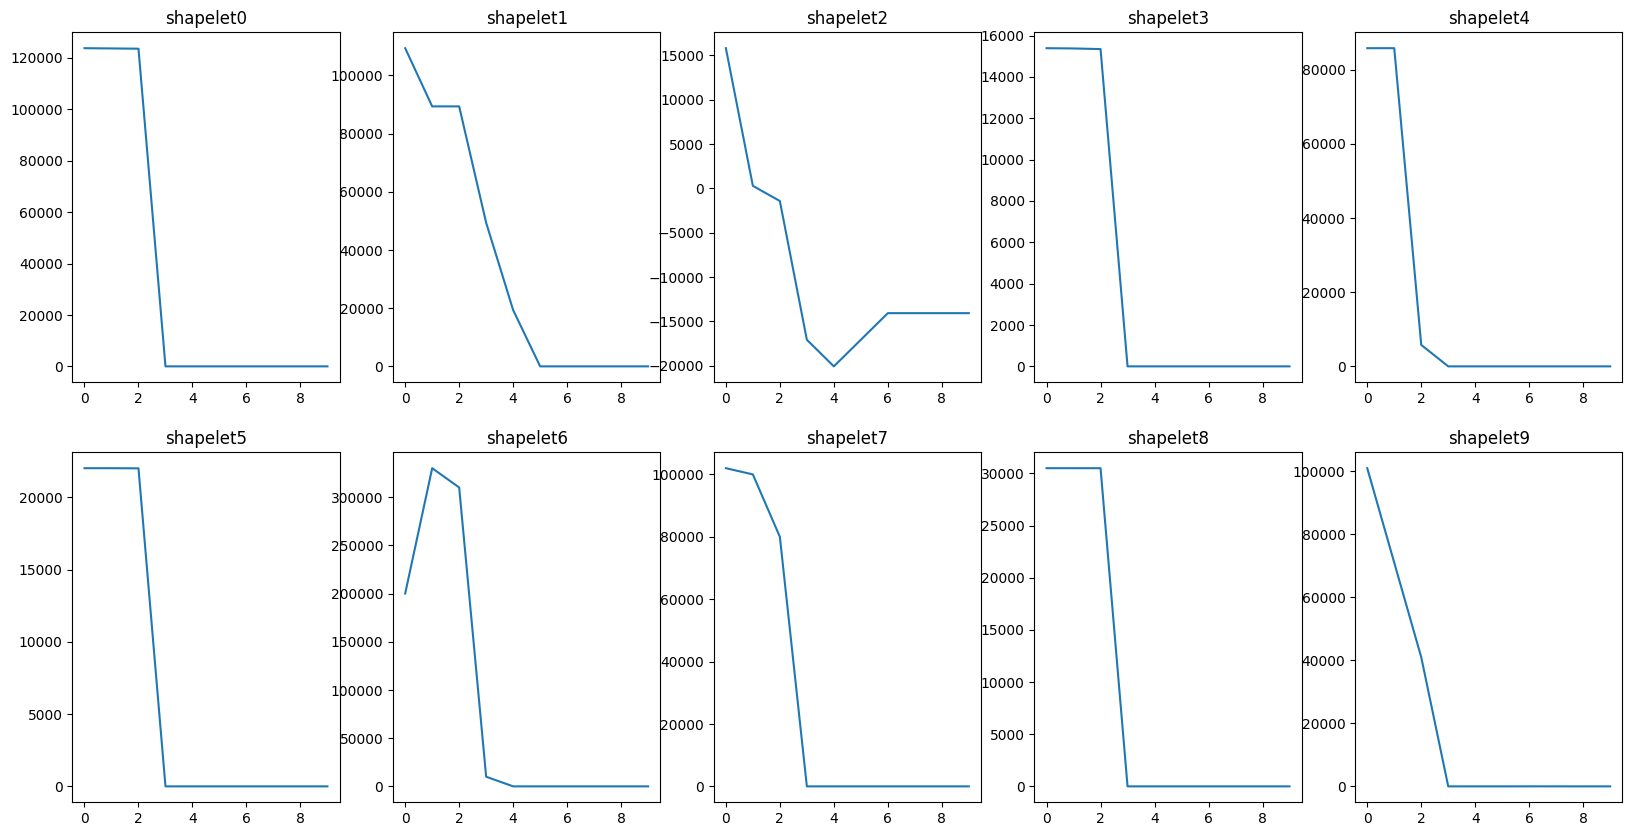

In [62]:
# 获取shaplets_vector
shapelets_vector = pd.read_csv(r'X:\Datasets\Blockchain\xblock.pro\eth-phishing-detection\datasets\etherscan\shapelets_vector.csv')

# 提取shapelets_vector中的shapelets
shapelets = shapelets_vector.values

shapelets_df = pd.DataFrame()

for item in shapelets:
    item_list = item[0][1:-1].split(' ')
    res = []
    for subitem in item_list:
        if subitem == '':
            continue
        # 去掉\n
        subitem = subitem.replace('\n', '')
        res.append(float(subitem))
    
    shapelets_df = shapelets_df.append(pd.DataFrame(res).T)
    
shapelets_df.reset_index(drop=True, inplace=True)
shapelets_df.fillna(0, inplace=True)

# 画图，画10张子图
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    axs[i//5, i%5].plot(shapelets_df.iloc[i, :])
    axs[i//5, i%5].set_title('shapelet' + str(i))
plt.show()
    

In [17]:
from sklearn.model_selection import train_test_split

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(data.drop(['label', 'address'], axis=1), data['label'], test_size=0.2, random_state=0)

In [18]:
# 训练模型
import xgboost

model = xgboost.XGBClassifier()

model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       738
           1       0.91      0.90      0.90       494

    accuracy                           0.92      1232
   macro avg       0.92      0.92      0.92      1232
weighted avg       0.92      0.92      0.92      1232



In [19]:
# 只使用基础特征
base_features = ['balance',	'degree']
graph_features = ['motif1',	'motif1_00',	'motif1_01',	'motif1_10',	'motif1_11',	'motif2',	'motif3',	'motif1_ratio',	'motif2_ratio',	'motif3_ratio',	'motif1_00_ratio',	'motif1_01_ratio',	'motif1_10_ratio',	'motif1_11_ratio']
shapelet_features = ['shapelet' + str(i) for i in range(10)]


In [20]:
# 使用base_features
X_train, X_test, y_train, y_test = train_test_split(data[base_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       738
           1       0.83      0.71      0.77       494

    accuracy                           0.83      1232
   macro avg       0.83      0.81      0.82      1232
weighted avg       0.83      0.83      0.83      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


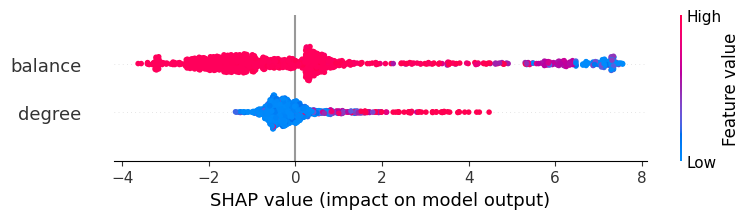

In [21]:
# shap可解释性分析

import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [22]:
# 使用graph_features
X_train, X_test, y_train, y_test = train_test_split(data[graph_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       738
           1       0.69      0.74      0.72       494

    accuracy                           0.76      1232
   macro avg       0.75      0.76      0.76      1232
weighted avg       0.77      0.76      0.76      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


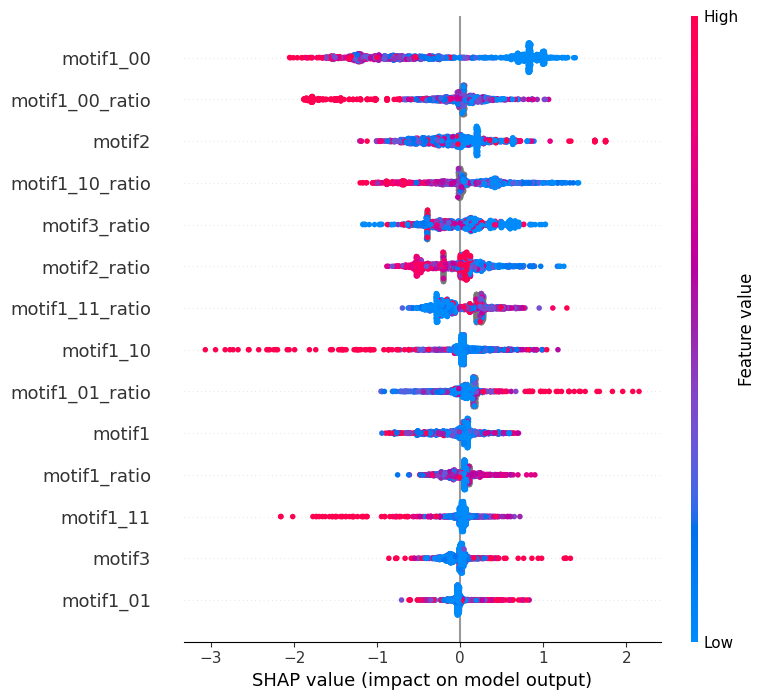

In [23]:
# shap可解释性分析

import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [24]:
# 使用shapelet_features
X_train, X_test, y_train, y_test = train_test_split(data[shapelet_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       738
           1       0.83      0.86      0.84       494

    accuracy                           0.87      1232
   macro avg       0.87      0.87      0.87      1232
weighted avg       0.87      0.87      0.87      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


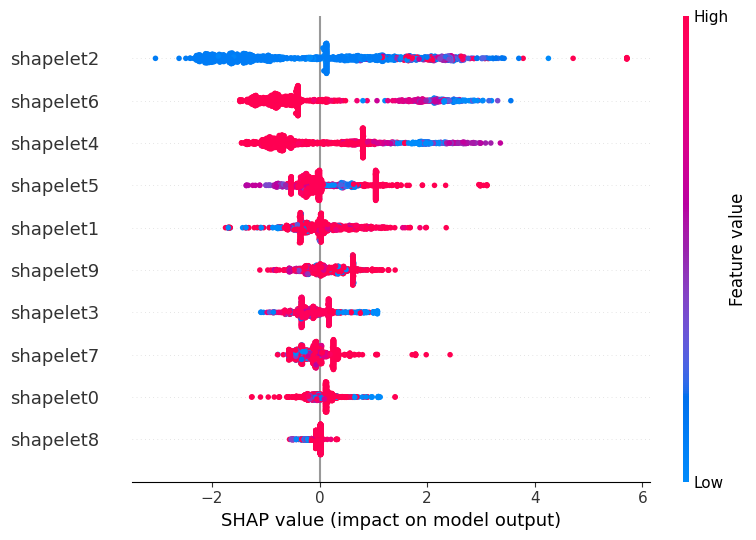

In [25]:
# shap可解释性分析

import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [26]:
# 使用base_features + graph_features + shapelet_features
X_train, X_test, y_train, y_test = train_test_split(data[base_features + graph_features + shapelet_features], data['label'], test_size=0.2, random_state=0)
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       738
           1       0.88      0.89      0.88       494

    accuracy                           0.91      1232
   macro avg       0.90      0.90      0.90      1232
weighted avg       0.91      0.91      0.91      1232



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


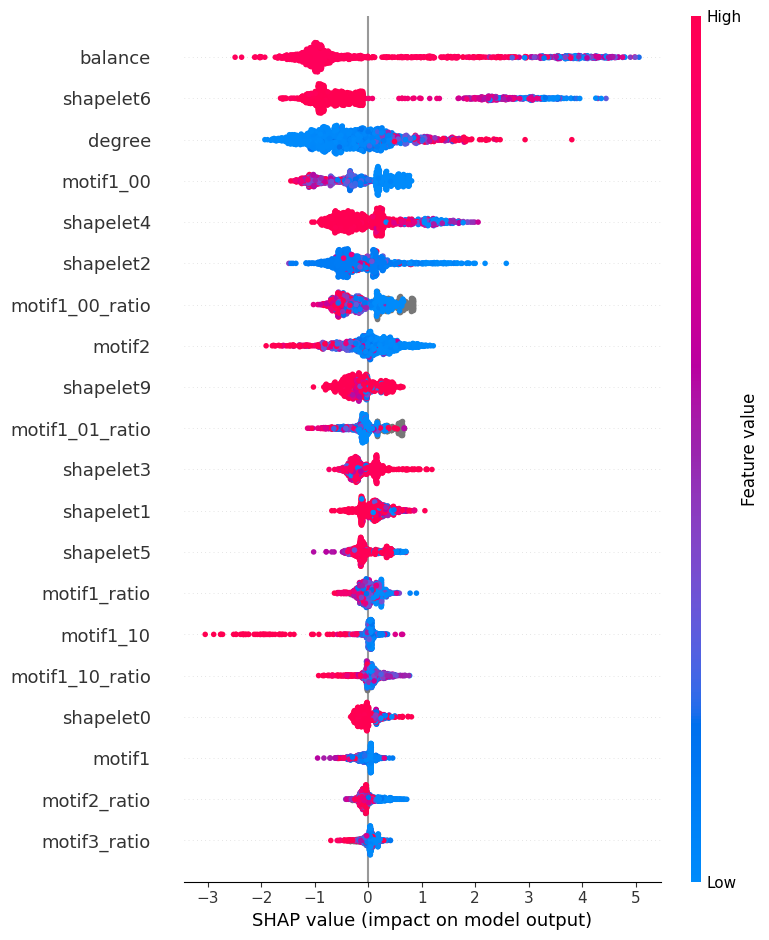

In [27]:
# shap可解释性分析

import shap

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
